In [12]:
import math

import matplotlib.pyplot as plt


import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()


from PySpice.Probe.Plot import plot
from PySpice.Spice.Netlist import Circuit
from PySpice.Spice.NgSpice.Shared import NgSpiceShared
from PySpice.Unit import *


In [13]:
class MyNgSpiceShared(NgSpiceShared):


    def __init__(self, amplitude, frequency, **kwargs):

        super().__init__(**kwargs)

        self._amplitude = amplitude
        self._pulsation = float(frequency.pulsation)


    def get_vsrc_data(self, voltage, time, node, ngspice_id):
        self._logger.debug('ngspice_id-{} get_vsrc_data @{} node {}'.format(ngspice_id, time, node))
        voltage[0] = self._amplitude * math.sin(self._pulsation * time)
        return 0


    def get_isrc_data(self, current, time, node, ngspice_id):
        self._logger.debug('ngspice_id-{} get_isrc_data @{} node {}'.format(ngspice_id, time, node))
        current[0] = 1.
        return 0

In [16]:
circuit = Circuit('Voltage Divider')

circuit.V('input', 'input', circuit.gnd, 'dc 0 external')
circuit.R(1, 'input', 'output', 10@u_kΩ)
circuit.R(2, 'output', circuit.gnd, 1@u_kΩ)

print(circuit)

.title Voltage Divider
Vinput input 0 dc 0 external
R1 input output 10kOhm
R2 output 0 1kOhm



(-11.0, 11.0)

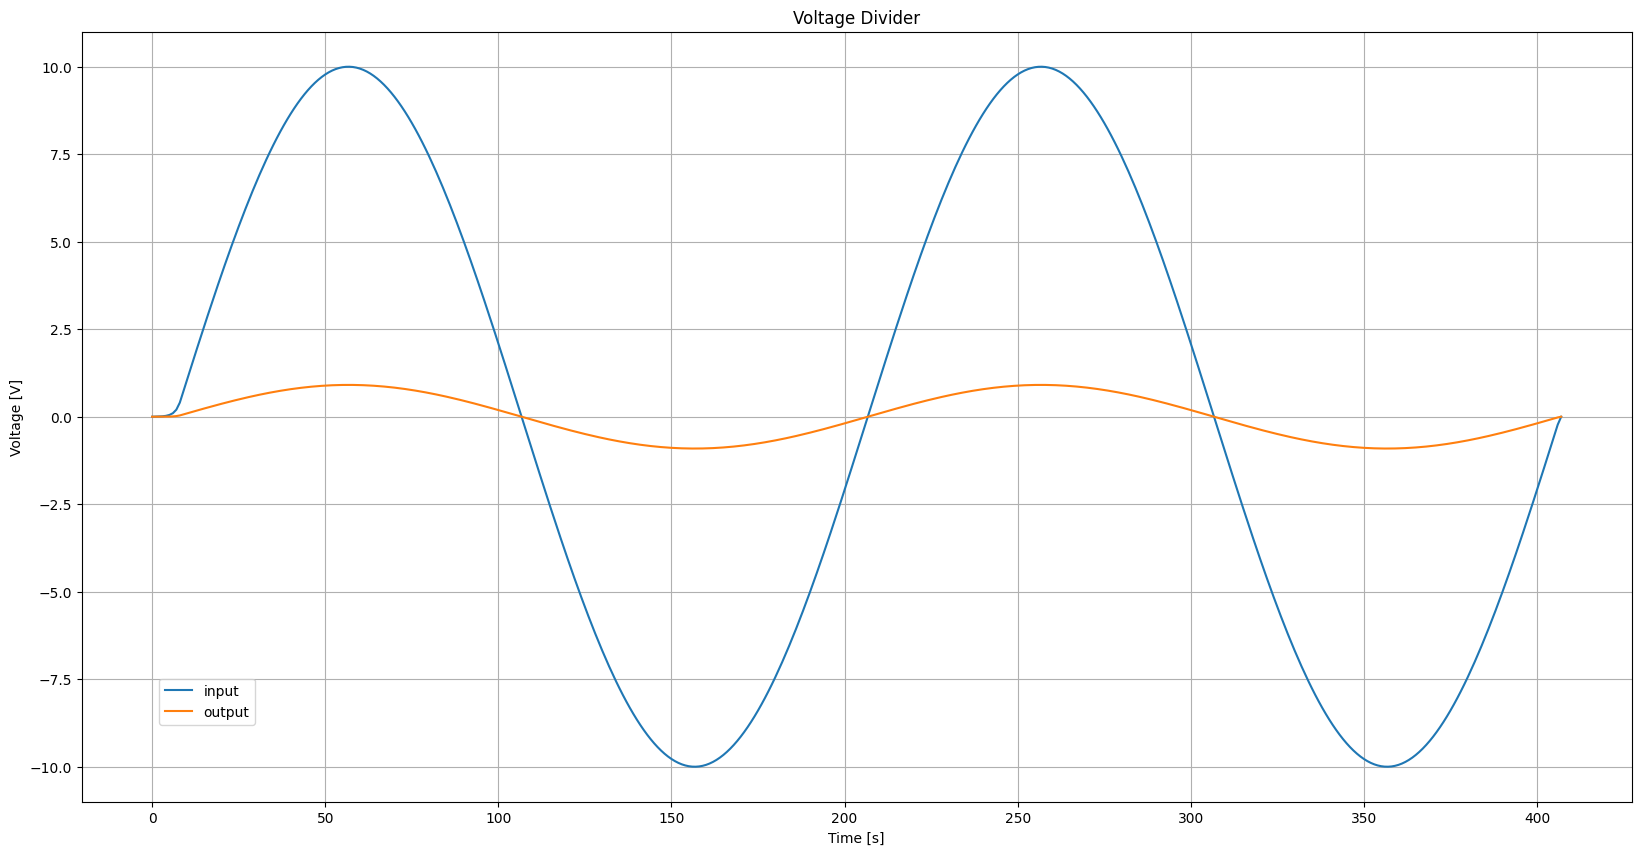

In [ ]:
figure1, ax = plt.subplots(figsize=(20, 10))
ax.set_title('Voltage Divider')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Voltage [V]')
ax.grid()
ax.plot(analysis.input)
ax.plot(analysis.output)
ax.legend(('input', 'output'), loc=(.05,.1))
ax.set_ylim(float(-amplitude*1.1), float(amplitude*1.1))